In [1]:
import pandas as pd
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline  
%autosave 300

Autosaving every 300 seconds


In [2]:
pd.options.display.max_columns = None
feature_names =defaultdict(lambda:'None')

In [3]:
drought_data=pd.read_csv('data/Drought Data.csv')
flood_data=pd.read_csv('data/Flood Data.csv')
heat_data=pd.read_csv('data/Heat Data.csv')
historical=pd.read_csv('data/Historical Hazards Outcome Data.csv')
risk_recovery=pd.read_csv('data/Overall Risk & Readiness Scores.csv')
sea_level_data=pd.read_csv('data/Sea Level Rise Data.csv')



In [4]:
df=heat_data.copy()
df.shape
#Counter(df['Historical Average Cost of Cold Event'])


(278, 14)

In [5]:

#df.drop(columns=['Unnamed: 14'], inplace=True)
#'cold_risk', 'cold_vuln', 'cold_expose','cold_sens', 'cold_adapt', 'cold_ready', 'cold_social', 'cold_gov','cold_econ', 'cold_hist_cost', ###'cold_p_heat2040']
#new_names=['city', 'state', 'geo_id','heat_risk', 'heat_vuln', 'heat_expose','heat_sens', 'heat_adapt', 'heat_ready', 'heat_social', 'heat_gov','heat_econ', 'heat_hist_cost','heat_prob_2040']
old_columns=df.columns
#df.columns = new_names


#indicators_dict = dict(zip(new_names, cold_data_old))
#feature_names['cold_data']=indicators_dict
df.columns

Index(['City', 'State', 'Geo.ID', 'Risk', 'Vulnerability', 'Exposure',
       'Sensitivity', 'Adaptive Capacity', 'Readiness', 'Social', 'Governance',
       'Economic', 'Historical Average Cost of Heat Event',
       'Probability of Heat Event in 2040'],
      dtype='object')

In [6]:
df.corr()

,Risk,Vulnerability,Exposure,Sensitivity,Adaptive Capacity,Readiness,Social,Governance,Economic,Historical Average Cost of Heat Event,Probability of Heat Event in 2040
Risk,1.000000,0.600438,0.934553,0.354360,-0.410378,-0.276874,-0.232474,-0.322035,-0.036444,0.002701,-0.308063
Vulnerability,0.600438,1.000000,0.276598,0.565918,-0.704345,-0.528668,-0.491029,-0.511236,-0.106432,0.060680,-0.156910
Exposure,0.934553,0.276598,1.000000,0.174030,-0.179754,-0.097488,-0.060880,-0.159516,0.003562,-0.023755,-0.302197
Sensitivity,0.354360,0.565918,0.174030,1.000000,0.186649,-0.256079,-0.288960,-0.298322,0.049889,0.028811,0.209751
Adaptive Capacity,-0.410378,-0.704345,-0.179754,0.186649,1.000000,0.409477,0.336316,0.352334,0.169779,-0.047500,0.375204
Readiness,-0.276874,-0.528668,-0.097488,-0.256079,0.409477,1.000000,0.737024,0.737184,0.616328,0.069163,0.233569
Social,-0.232474,-0.491029,-0.060880,-0.288960,0.336316,0.737024,1.000000,0.388960,0.074208,-0.003935,0.156014
Governance,-0.322035,-0.511236,-0.159516,-0.298322,0.352334,0.737184,0.388960,1.000000,0.232172,0.032399,0.165942
Economic,-0.036444,-0.106432,0.003562,0.049889,0.169779,0.616328,0.074208,0.232172,1.000000,0.120510,0.173103
Historical Average Cost of Heat Event,0.002701,0.060680,-0.023755,0.028811,-0.047500,0.069163,-0.003935,0.032399,0.120510,1.000000,0.029694


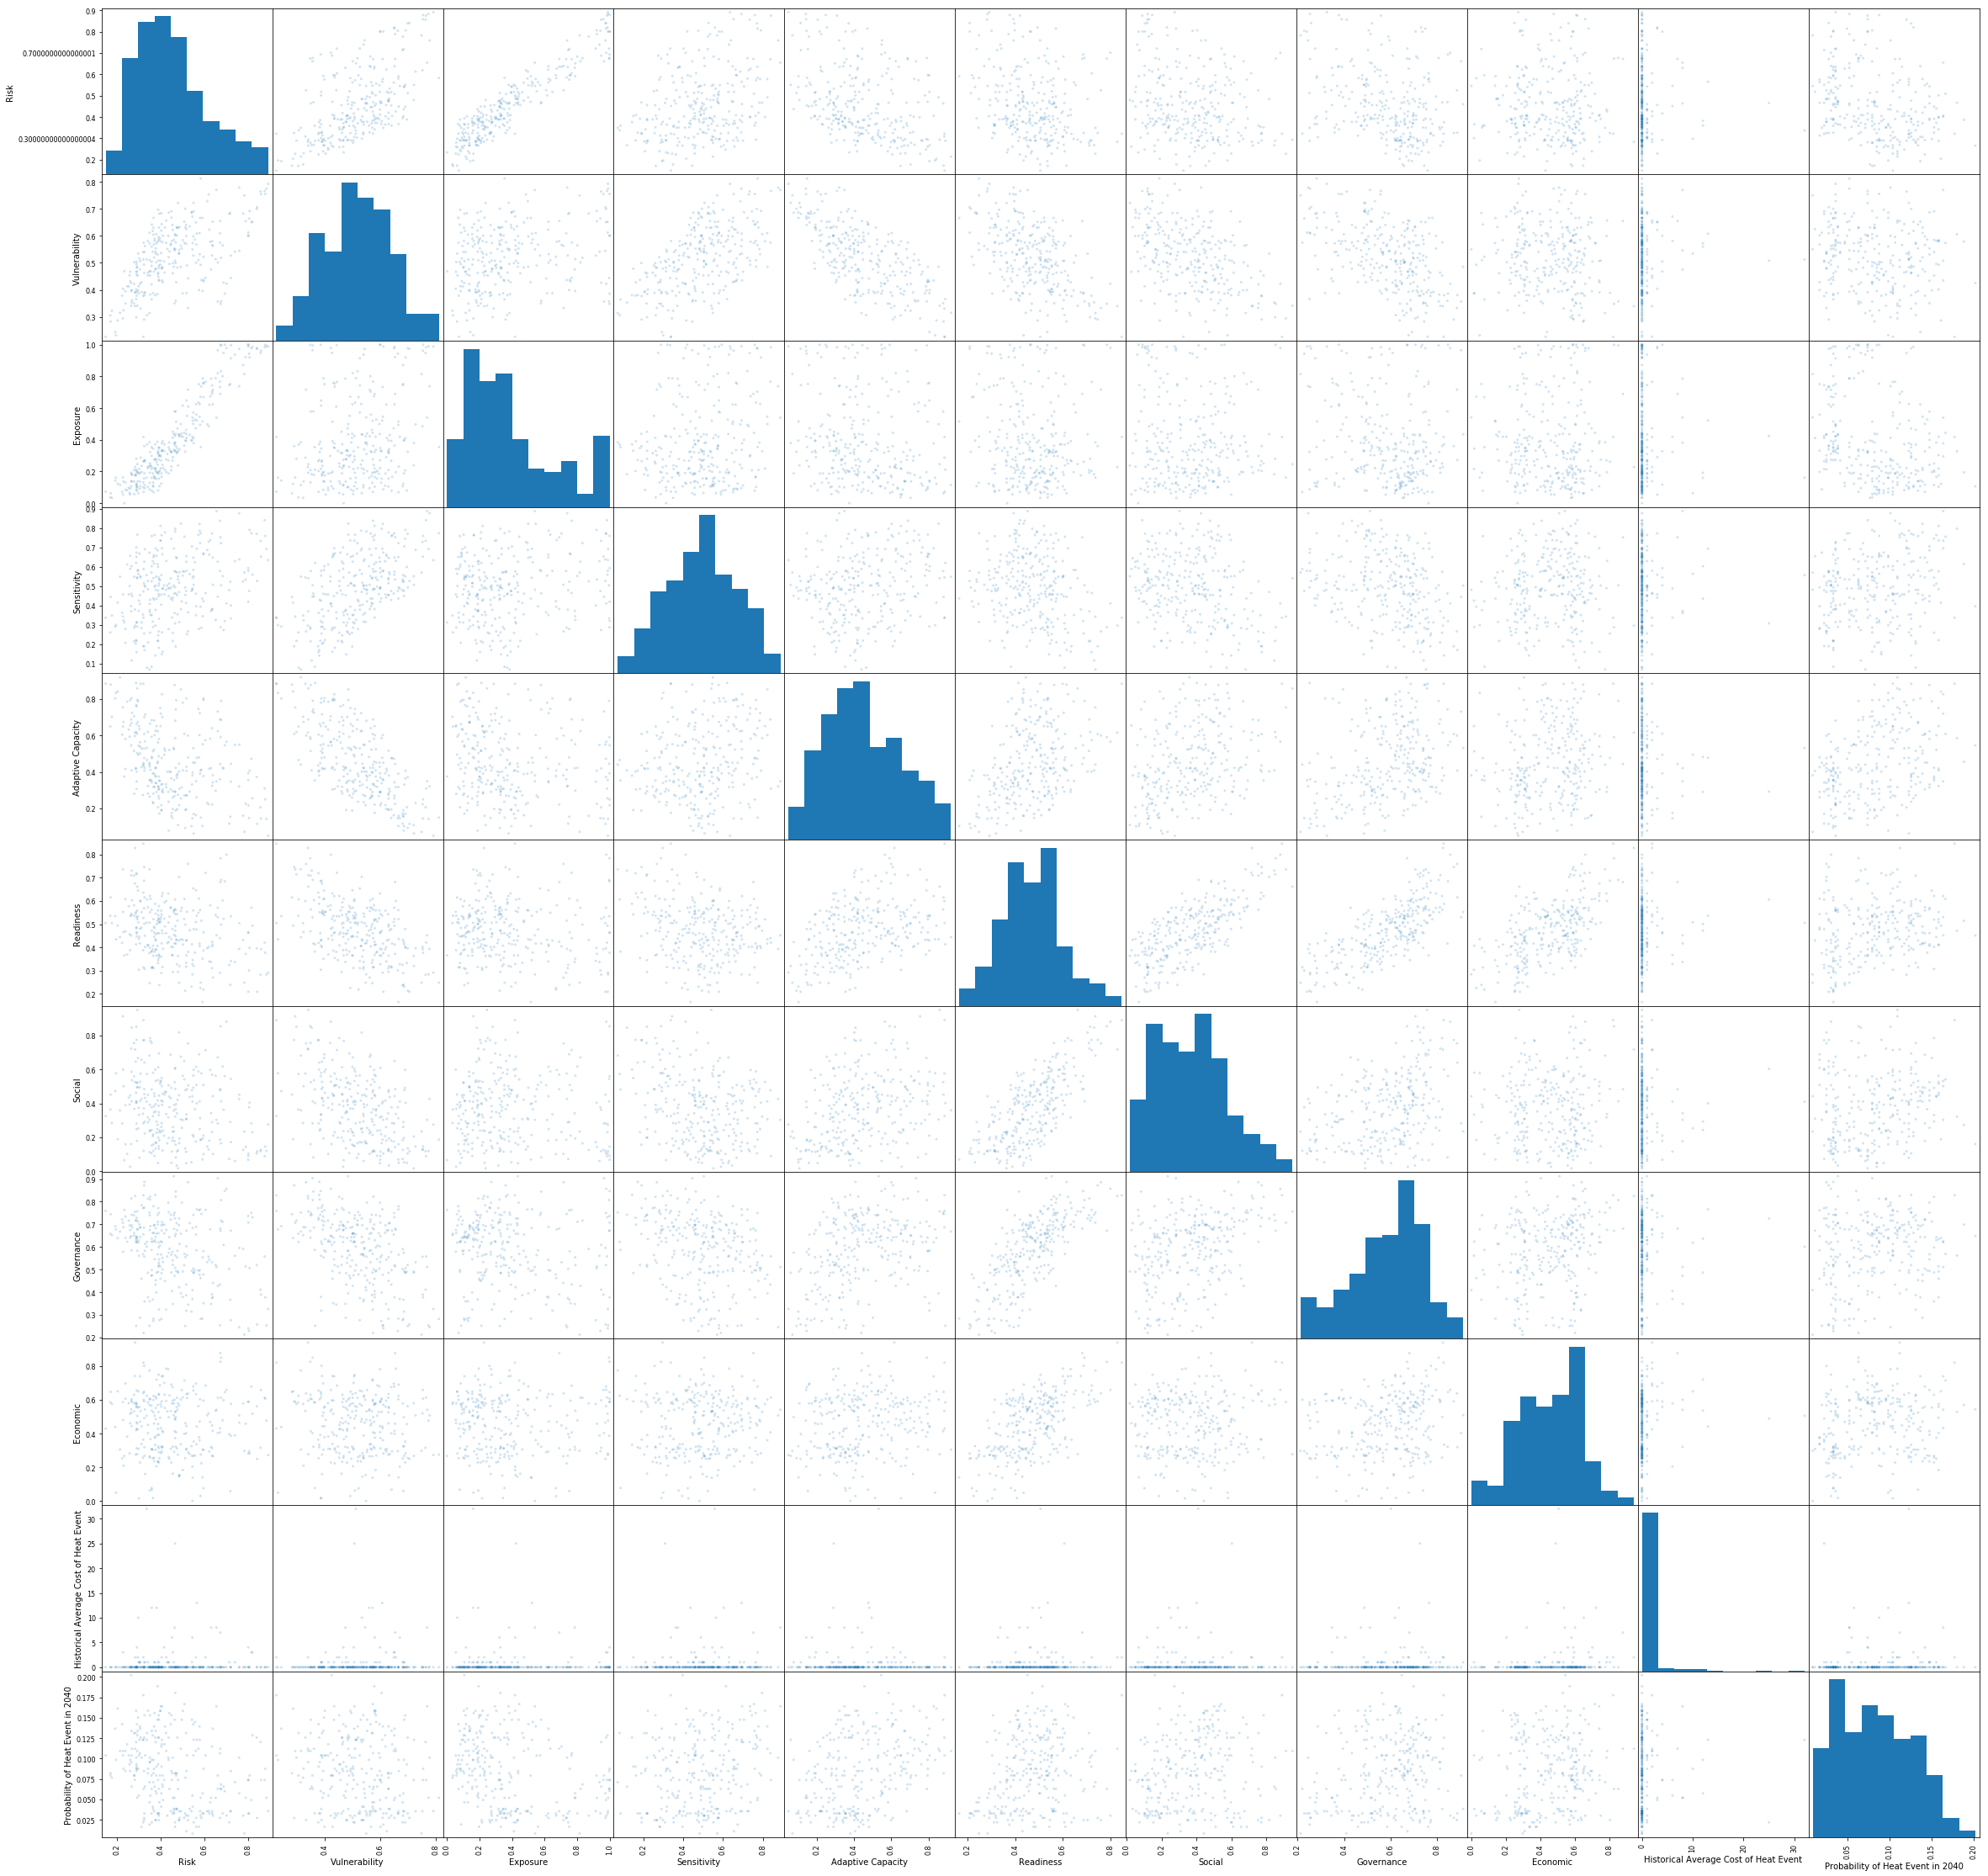

In [14]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(40,40))

plt.show()

In [15]:
output=df.describe()
#output.to_csv('cold_data')
output

,Risk,Vulnerability,Exposure,Sensitivity,Adaptive Capacity,Readiness,Social,Governance,Economic,Historical Average Cost of Heat Event,Probability of Heat Event in 2040
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,272.000000
mean,0.454514,0.519510,0.389518,0.490925,0.451905,0.471330,0.372489,0.586881,0.454621,0.730216,0.083524
std,0.162599,0.120411,0.270609,0.174007,0.202100,0.125325,0.202898,0.156369,0.180363,3.004669,0.043765
min,0.149263,0.225877,0.000000,0.068669,0.049684,0.164831,0.018305,0.213018,0.000000,0.000000,0.008197
25%,0.331461,0.431485,0.187400,0.362519,0.303850,0.388328,0.200324,0.490569,0.306635,0.000000,0.038251
50%,0.410356,0.519136,0.323700,0.493997,0.420770,0.465124,0.366909,0.620818,0.469878,0.000000,0.081967
75%,0.550431,0.601668,0.526270,0.619642,0.602133,0.551589,0.504821,0.698243,0.591855,0.000000,0.120220
max,0.891089,0.812442,1.000000,0.888790,0.919387,0.846282,0.949099,0.912531,0.940881,32.000000,0.202190


In [9]:
df.columns

Index(['City', 'State', 'Geo.ID', 'Risk', 'Vulnerability', 'Exposure',
       'Sensitivity', 'Adaptive Capacity', 'Readiness', 'Social', 'Governance',
       'Economic', 'Historical Average Cost of Heat Event',
       'Probability of Heat Event in 2040'],
      dtype='object')

In [10]:
#features_original

In [11]:
a=12
df.iloc[:,a].describe()
#charles=(df.iloc[:,a])
#print(df.iloc[20:150,a])
#print(df.iloc[24])

count    278.000000
mean       0.730216
std        3.004669
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       32.000000
Name: Historical Average Cost of Heat Event, dtype: float64

In [12]:
df.iloc[:,a].unique()


array([ 0,  1,  2,  8,  3,  4, 12,  6,  7, 10, 25, 32, 13])

In [16]:
df1 = df[df.isna().any(axis=1)]
print(df1)

          City State            Geo.ID      Risk  Vulnerability  Exposure  \
7    Anchorage    AK  1600000US0203000  0.234429       0.468858  0.000000   
19     Bayamon    PR  1600000US7206593  0.517982       0.387773  0.648192   
35    Carolina    PR  1600000US7214290  0.501362       0.387050  0.615675   
110   Honolulu    HI  1600000US1571550  0.469400       0.359448  0.579352   
193      Ponce    PR  1600000US7263820  0.288477       0.365791  0.211164   
220   San Juan    PR  1600000US7276770  0.595740       0.431455  0.760025   

     Sensitivity  Adaptive Capacity  Readiness    Social  Governance  \
7       0.312536           0.374821   0.365688  0.066166    0.763855   
19      0.579278           0.803732   0.429484  0.335649    0.318901   
35      0.554378           0.780278   0.432362  0.302365    0.379221   
110     0.462305           0.743409   0.416500  0.082830    0.845035   
193     0.620399           0.888818   0.413045  0.401945    0.251957   
220     0.665690           0

In [13]:
print(df['flood_hist_cost'].isna())
df.fillna(0, inplace = True)
row=0
count=0
for value in df.iloc[:,a]:
    if value:
        print(df.iloc[row,0:2],df.iloc[row,a])
        
        count+=1
    row+=1
print(count)

KeyError: 'flood_hist_cost'

In [ ]:
city_indicators=pd.read_csv('data/City Indicators.csv')
city_indicators_old=df.columns
new_names=['city','state','geo_id','GDP_water_all','perc_fff','d_plan','w_plan','base_w_stress','invest','tax_break','corruption','perc_vote','innovate','climate_real','hs_ed','pop_dens','w_quality','debt','flood_pop','flood_build','flood_car','impervious','beds_1000','alone_65','child_5','health_ins','older_1999','mobile_home','rent_50plus','trees','heating','disabled','poverty','older_1979','work_outside','no_car','pop_under_1ft','pop_under_3ft','impact_plus1ft','impact_plus3ft', 'col_empty','lat','long','county','region','city_km2','pop_2010','pop_2011','pop_2012','pop_2013','pop_2014','pop_2015','median_income']
indicators_dict = dict(zip(new_names, city_indicators_old))
city_indicators.columns = new_names
city_indicators.drop(columns =['col_empty'], inplace= True)

feature_names['city_indicators']=indicators_dict



fig = plt.figure()

count=1
drop_list=list(city_indicators.columns)
for header in city_indicators.columns:
    x=city_indicators[header]
    for header2 in drop_list:
        plt.show(count)
        y=city_indicators[header2]
        ax = fig.add_subplot()
        plt.scatter(x, y, alpha=0.5)
        
        drop_list.remove(header2)
        count+=1

cold_data=pd.read_csv('data/Cold Data.csv')
cold_data_old=df.columns
new_names=['city', 'state', 'geo_id', 'cold_risk', 'cold_vuln', 'cold_expose','cold_sens', 'cold_adapt', 'cold_ready', 'cold_social', 'cold_gov','cold_econ', 'cold_hist_cost', 'cold_p_heat2040']
cold_data.columns = new_names


indicators_dict = dict(zip(new_names, cold_data_old))
feature_names['cold_data']=indicators_dict

In [18]:
cold_data=pd.read_csv('data/Cold Data.csv')
cold_data_old=df.columns
new_names=['city', 'state', 'geo_id', 'cold_risk', 'cold_vuln', 'cold_expose','cold_sens', 'cold_adapt', 'cold_ready', 'cold_social', 'cold_govG','cold_econ', 'cold_hist_cost', 'cold_p_heat2040']
cold_data.columns = new_names


cold_dict = dict(zip(new_names, cold_data_old))
feature_names['cold_data']=cold_dict
cold_data.head()

,city,state,geo_id,cold_risk,cold_vuln,cold_expose,cold_sens,cold_adapt,cold_ready,cold_social,cold_govG,cold_econ,cold_hist_cost,cold_p_heat2040
0,Abilene,TX,1600000US4801000,0.273499,0.476102,0.070897,0.588600,0.636397,0.314172,0.120899,0.220609,0.601007,0,0.046448
1,Akron,OH,1600000US3901000,0.377616,0.451854,0.303378,0.736974,0.833266,0.507762,0.514565,0.514348,0.494373,0,0.019126
2,Albuquerque,NM,1600000US3502000,0.359672,0.448611,0.270733,0.489958,0.592735,0.631972,0.317515,0.795843,0.782557,0,0.062842
3,Alexandria,VA,1600000US5101000,0.655764,0.363280,0.948248,0.272741,0.546180,0.523200,0.362578,0.609321,0.597701,0,0.010929
4,Allentown,PA,1600000US4202000,0.719053,0.699601,0.738505,0.877971,0.478770,0.393285,0.425955,0.245751,0.508149,0,0.005465


In [ ]:
risk_recovery=pd.read_csv('data/Overall Risk & Readiness Scores.csv')
risk_recovery_old=risk_recovery.columns
new_names=['city', 'state', 'geo_id','overall_risk', 'overall_readiness']
risk_recovery.columns = new_names


risk_recovery_dict = dict(zip(new_names, risk_recovery_old))
feature_names['risk_recovery']=risk_recovery_dict


In [ ]:
drought_data=pd.read_csv('data/Drought Data.csv')
drought_data.drop(columns=['Unnamed: 14'], inplace=True)
old_columns=drought_data.columns
new_names=['city', 'state', 'geo_id','drought_risk', 'drought_vuln', 'drought_expose','drought_sens', 'drought_adapt', 'drought_ready', 'drought_social', 'drought_gov','drought_econ', 'drought_hist_cost','drought_future_cost','drt_dev_forecast','drt_dev_for_vs_norm','drt_.5sdev_G','drt_.5sdev_G','drt_dist_sdev']
drought_data.columns = new_names


drought_dict = dict(zip(new_names, old_columns))
feature_names['drought_data']=drought_dict
feature_names

In [17]:
flood_data=pd.read_csv('data/Flood Data.csv')
#20 cities had NA for historical flood data.  The 
flood_data.fillna(0, inplace = True)
new_names=['city', 'state', 'geo_id','flood_risk', 'flood_vuln', 'flood_expose','flood_sens', 'flood_adapt', 'flood_ready', 'flood_social', 'flood_gov','flood_econ', 'flood_hist_cost','flood_future_cost','flood_prob_2040','flood_prob_2019_40']
old_columns=flood_data.columns
flood_data.columns = new_names

flood_data_dict = dict(zip(new_names, old_columns))
feature_names['flood_data']=flood_data_dict
#indicators_dict = dict(zip(new_names, cold_data_old))
#feature_names['cold_data']=indicators_dict
df.head()

,City,State,Geo.ID,Risk,Vulnerability,Exposure,Sensitivity,Adaptive Capacity,Readiness,Social,Governance,Economic,Historical Average Cost of Heat Event,Probability of Heat Event in 2040
0,Abilene,TX,1600000US4801000,0.322691,0.574485,0.070897,0.588600,0.439631,0.314172,0.120899,0.220609,0.601007,0,0.062842
1,Akron,OH,1600000US3901000,0.398229,0.493080,0.303378,0.736974,0.750813,0.507762,0.514565,0.514348,0.494373,0,0.158470
2,Albuquerque,NM,1600000US3502000,0.435242,0.599751,0.270733,0.489958,0.290455,0.631972,0.317515,0.795843,0.782557,1,0.101090
3,Alexandria,VA,1600000US5101000,0.687454,0.426660,0.948248,0.272741,0.419421,0.523200,0.362578,0.609321,0.597701,0,0.065574
4,Allentown,PA,1600000US4202000,0.758587,0.778669,0.738505,0.877971,0.320632,0.393285,0.425955,0.245751,0.508149,0,0.101090
